# Give Me Some Credit

## Training session

Author: Ramy Ghorayeb

Date: 11/10/2018

## 0. Préliminaires

Render plots aesthetically in the notebook

Never print warnings

In [64]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1. Chargement des donnés

Chargement des données dans 'train' et des features dans 'features_name'

In [65]:
import pandas as pd

train = pd.read_csv('cs-training.csv',index_col=0)

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [67]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [84]:
features_names = list(train)[1:]
print(feature_names)
train.dtypes

['SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime30-59DaysPastDueNotWorse' 'DebtRatio' 'MonthlyIncome'
 'NumberOfOpenCreditLinesAndLoans' 'NumberOfTimes90DaysLate'
 'NumberRealEstateLoansOrLines' 'NumberOfTime60-89DaysPastDueNotWorse'
 'NumberOfDependents']


SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

## 2. Préparation des folds

On pourra utiliser sklearn.cross_validation pour préparer les folds plus tard

In [11]:
import random

def kfolds(k,N,seed=None):
    random.seed(seed)
    out = [ list() for _ in range(k)]
    for n in range(N):
        out[random.randrange(k)].append(n)
    return(out)

K = kfolds(k=5,N=len(train),seed=3984)
fold1 = sum(K[1:5],[])

## 3. Imputation des donnés manquantes

Remplacer les NaN par la médiane de la colonne correspondante.

In [14]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values = "NaN", strategy='median',axis=0)
train = imp.fit_transform(train)

xtrain = train[fold1,1:]
ytrain = train[fold1,0]
xtest = train[K[0],1:]
ytest = train[K[0],0]

1          9120.0
2          2600.0
3          3042.0
4          3300.0
5         63588.0
6          3500.0
7             NaN
8          3500.0
9             NaN
10        23684.0
11         2500.0
12         6501.0
13        12454.0
14        13700.0
15            0.0
16        11362.0
17            NaN
18         8800.0
19         3280.0
20          333.0
21        12300.0
22         3000.0
23         2500.0
24         7916.0
25         2416.0
26         4676.0
27         8333.0
28         2500.0
29         3400.0
30         5500.0
           ...   
149971    15500.0
149972     5000.0
149973     6945.0
149974     5500.0
149975     5000.0
149976        NaN
149977        NaN
149978        NaN
149979     2500.0
149980     8700.0
149981     5525.0
149982     6849.0
149983     2760.0
149984     5000.0
149985        NaN
149986     1950.0
149987     5000.0
149988     3249.0
149989     7515.0
149990     9233.0
149991     4335.0
149992    10316.0
149993        NaN
149994      820.0
149995    

## 4. GLM

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
from sklearn.metrics import roc_auc_score, log_loss

lr_preds = lr.predict_proba(xtest)[:,1]

print("auc: {}".format(roc_auc_score(ytest, lr_preds)))
print("log_loss: {}".format(log_loss(ytest,lr_preds)))

auc: 0.6964457732293605
log_loss: 0.23300490181422862


## 5. Support Vector Machines

In [32]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(xtrain,ytrain)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [34]:
svm_preds = svm.predict(xtest)

print("auc: {}".format(roc_auc_score(ytest, svm_preds)))
print("log_loss: {}".format(log_loss(ytest,svm_preds)))

auc: 0.5339761385465559
log_loss: 2.341300509233351


## 6. Gradient Boosted Machines

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(loss='exponential')
gbm.fit(xtrain,ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [38]:
gbm_oc = GradientBoostingClassifier()
gbm_oc.fit(xtrain,ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [76]:
gbm_preds = gbm.predict_proba(xtest)[:,1]
print("auc:      {}".format(roc_auc_score(ytest, gbm_preds)))
print("log_loss: {}".format(log_loss(ytest,gbm_preds)))

gbm_oc_preds = gbm_oc.predict_proba(xtest)[:,1]
print("auc:      {}".format(roc_auc_score(ytest, gbm_oc_preds)))
print("log_loss: {}".format(log_loss(ytest,gbm_oc_preds)))

auc:      0.8685805671975544
log_loss: 0.18061666082957828
auc:      0.867843336811152
log_loss: 0.1814039841788481


## 7. Changer les paramètres

In [78]:
gbm = GradientBoostingClassifier(loss="deviance",
                                 n_estimators=100,
                                 learning_rate=0.1,
                                 max_depth=5,
                                 subsample=0.75,
                                 verbose=1)
gbm.fit(xtrain, ytrain)
gbm_preds = gbm.predict_proba(xtest)[:,1]
print("auc:      {}".format(roc_auc_score(ytest, gbm_preds)))
print("log_loss: {}".format(log_loss(ytest,gbm_preds)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.4485           0.0378           23.14s
         2           0.4302           0.0199           24.40s
         3           0.4166           0.0133           25.40s
         4           0.4063           0.0101           25.91s
         5           0.3947           0.0081           28.17s
         6           0.3917           0.0060           27.60s
         7           0.3855           0.0053           27.11s
         8           0.3813           0.0042           26.15s
         9           0.3765           0.0033           25.88s
        10           0.3716           0.0029           25.15s
        20           0.3561           0.0005           20.75s
        30           0.3529           0.0003           19.60s
        40           0.3470           0.0001           16.64s
        50           0.3429          -0.0001           14.09s
        60           0.3405          -0.0002           11.35s
       

In [79]:
aucs = [ roc_auc_score(ytest, gbm_pred[:,1]) for gbm_pred in gbm.staged_predict_proba(xtest) ]

Text(0,0.5,'AUC')

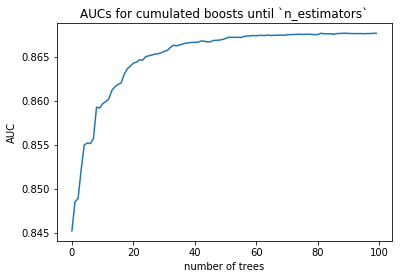

In [80]:
import matplotlib.pyplot as plt
plt.plot(aucs)
plt.title("AUCs for cumulated boosts until `n_estimators`")
plt.xlabel("number of trees")
plt.ylabel("AUC")

## 9. Importance des variables et dépendances partielles

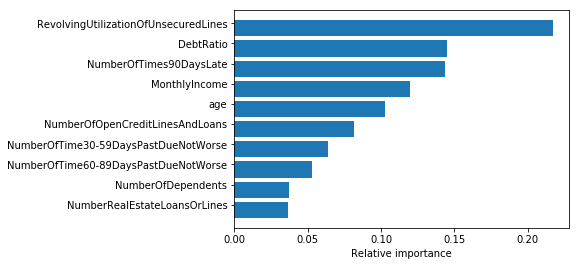

In [85]:
import numpy as np
# sort importances
indices = np.argsort(gbm.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(features_names)), gbm.feature_importances_[indices])
plt.yticks(np.arange(len(features_names)) + 0.25, np.array(features_names)[indices])
_ = plt.xlabel('Relative importance')

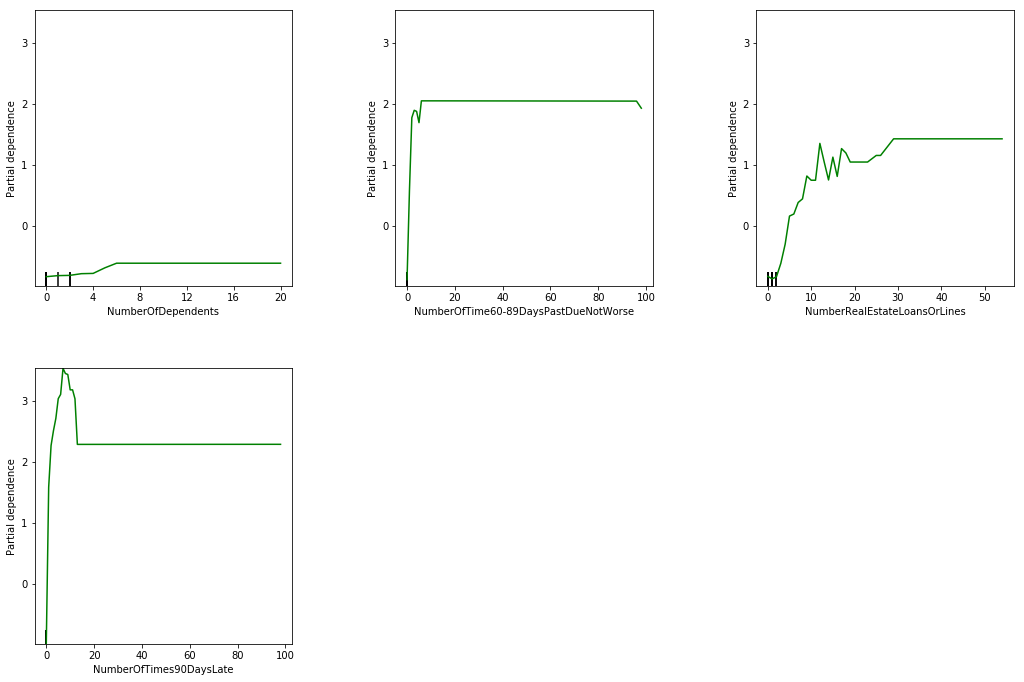

In [88]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
features =  [u'RevolvingUtilizationOfUnsecuredLines',
             u'age',
             u'NumberOfTime30-59DaysPastDueNotWorse',
             u'DebtRatio', u'MonthlyIncome',
             u'NumberOfOpenCreditLinesAndLoans',
             u'NumberOfTimes90DaysLate',
             u'NumberRealEstateLoansOrLines',
             u'NumberOfTime60-89DaysPastDueNotWorse',
             u'NumberOfDependents',
             (u'RevolvingUtilizationOfUnsecuredLines',u'NumberOfTimes90DaysLate'),
             (u'MonthlyIncome',u'age')
            ]
top4 = features_names[-1:-5:-1]
_ = plot_partial_dependence(gbm, xtrain, top4,
                            feature_names=features_names,figsize=(16,16))

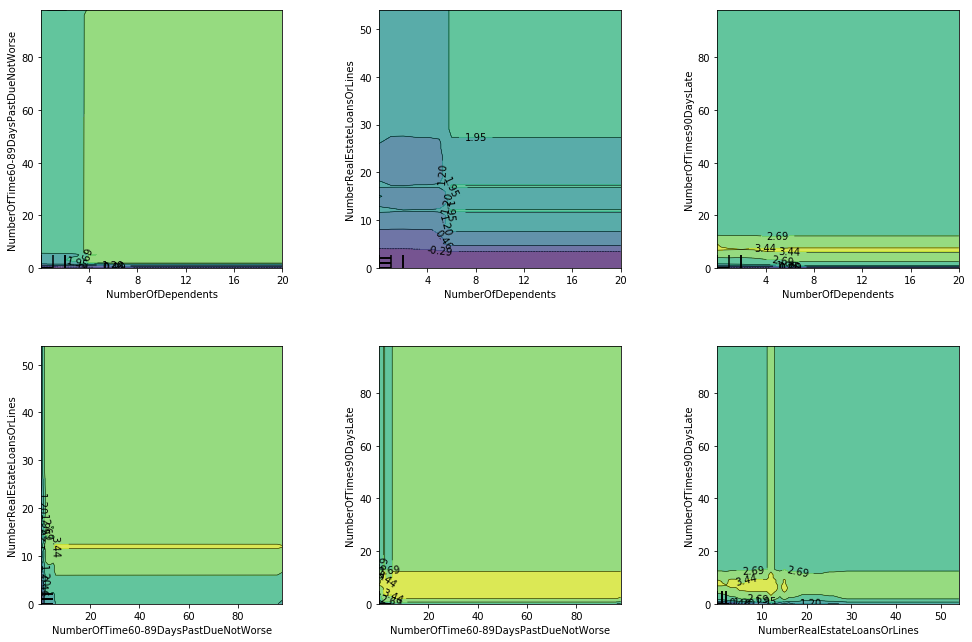

In [90]:
from itertools import combinations

_ = plot_partial_dependence(gbm, xtrain, combinations(top4,2),
                        feature_names=features_names, figsize=(15,15))

## 10. Forets Aleatoires

In [95]:
from sklearn.ensemble import RandomForestClassifier

def fit_model(traini):
    rfc = RandomForestClassifier()
    rfc.fit(xtrain[traini], ytrain[traini])
    return(rfc)

import multiprocessing
num_cores = multiprocessing.cpu_count()

from sklearn.cross_validation import KFold
kf = list(KFold(len(xtrain),num_cores))

from joblib import Parallel, delayed  

kf = list(KFold(len(xtrain),num_cores))
rfcs = Parallel(n_jobs=num_cores)( delayed(fit_model)(traini) for traini,_ in kf)
preds = np.empty_like(ytrain)
for i,(_,testi) in enumerate(kf):
    preds[testi] = rfcs[i].predict_proba(xtrain[testi])[:,1]

print("auc:      {}".format(roc_auc_score(ytrain, preds)))
print("log_loss: {}".format(log_loss(ytrain,preds)))

auc:      0.7798023040724407
log_loss: 0.7157891392644637


On voit que les résultats sont moins bons que pour les Boosted Models avec les paramètres par défaut. On cherche donc à voir s'il existe des paramètres qui donnent une meilleure AUC. Ici on utilise `GridSearchCV`, `cross_val_score` et le paramètre `n_jobs` qui sont des outils très pratiques de `scikit-learn`. En réalité `n_jobs` fait appel à `joblib` et on aurait pu l'utiliser pour les GBM également, tout comme `GridSearchCV` et `cross_val_score`. L'idée étant d'aborder les problèmes et les outils sous différents angles pour mieux les cerner.

In [ ]:
from sklearn.cross_validation import cross_val_score
#Uncomment the following for GridSearch: can take 1+ hour
#from sklearn.grid_search import GridSearchCV
#gs = GridSearchCV(RandomForestClassifier(n_jobs=-1), 
#                  {'max_features' : range(1,11), 'n_estimators': [500]}, 
#                  scoring='roc_auc')
#gs.fit(xtrain,ytrain)
#print(gs.best_params_) #Outputs {'max_features':1, 'n_estimators' : 500}
cross_val_score(RandomForestClassifier(max_features=1,n_estimators=500,n_jobs=-1),
                xtrain, ytrain, cv=num_cores, scoring='roc_auc').mean()

On peut, comme pour les GBM, utiliser le modèle appris pour classer les variables par ordre d'importance.

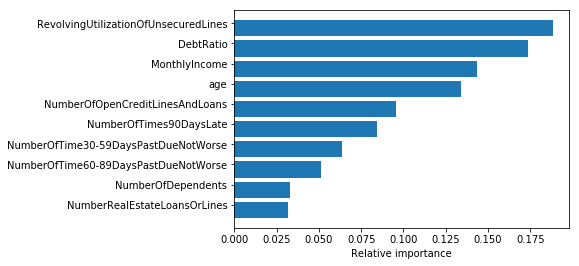

In [99]:
rfc = RandomForestClassifier(n_estimators=500,max_features=1,n_jobs=-1)
rfc.fit(xtrain,ytrain)
indices = np.argsort(rfc.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(features_names)), rfc.feature_importances_[indices])
plt.yticks(np.arange(len(features_names)) + 0.25, np.array(features_names)[indices])
_ = plt.xlabel('Relative importance')

On constate que c'est le même ordre d'importance que pour le GBM estimé plus haut.

## 11. Mélange

In [100]:
def fit_gbm(traini):
    gbm = GradientBoostingClassifier(loss="deviance",
                                     n_estimators = 100,
                                     learning_rate = 0.1,
                                     max_depth = 5,
                                     subsample = .75,
                                     verbose = 0)
    gbm.fit(xtrain[traini],ytrain[traini])
    return(gbm)

gbms = Parallel(n_jobs=num_cores)( delayed(fit_gbm)(traini) for traini,_ in kf)

def fit_rfc(traini):
    rfc = RandomForestClassifier(n_estimators=500,max_features=1)
    rfc.fit(xtrain[traini],ytrain[traini])
    return(rfc)

rfcs = Parallel(n_jobs=num_cores)( delayed(fit_rfc)(traini) for traini,_ in kf)

In [101]:
preds = np.empty_like(ytrain)
for i,(_,testi) in enumerate(kf):
    preds[testi] = (.07*rfcs[i].predict_proba(xtrain[testi])[:,1] +
                    .93*gbms[i].predict_proba(xtrain[testi])[:,1])
print("auc:      {}".format(roc_auc_score(ytrain, preds)))
print("log_loss: {}".format(log_loss(ytrain,preds)))

auc:      0.8635998518233047
log_loss: 0.1781390845501305


## 12. Predictions sur les données de test en csv

In [ ]:
gbm = GradientBoostingClassifier(loss="deviance",
                                 n_estimators = 100,
                                 learning_rate = 0.1,
                                 max_depth = 5,
                                 subsample = .75,
                                 verbose = 0)
gbm.fit(xtrain,ytrain)
rfc = RandomForestClassifier(n_estimators=500,
                             max_features=1)
rfc.fit(xtrain,ytrain)

testname = "cs-test.csv"
testf = datapath + testname
test = pd.read_csv(testf,index_col=0)
test = imp.fit_transform(test)

preds = .07*rfc.predict_proba(test)[:,1] + .93*gbm.predict_proba(test)[:,1]

On peut vouloir stocker les prédictions sur disque sous forme de fichier csv